<a href="https://colab.research.google.com/github/RehanShabbir16/Modern_computer_vision_with_pytorch/blob/main/Chapter__2_Pytorch_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
print(torch.__version__)

2.3.1+cu121


In [2]:
a=torch.tensor([1,2,3])
b=torch.tensor([4,5,6])
print(a.shape)
print(b.dtype)

torch.Size([3])
torch.int64


In [3]:
torch.zeros((3,4))

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [4]:
torch.randn((3,4))


tensor([[ 1.1138, -0.7774,  0.8376, -1.7775],
        [-0.5444,  0.2233, -0.4661,  0.8897],
        [ 1.0340,  0.7391,  1.1301,  0.9218]])

In [5]:
torch.rand((3,4))


tensor([[0.7710, 0.8474, 0.7042, 0.9469],
        [0.7608, 0.7172, 0.8951, 0.3661],
        [0.1452, 0.8982, 0.3998, 0.2358]])

In [6]:
x = torch.randn(10,10,10)
y = torch.cat([x,x], axis=0) # np.concatenate()
print('Cat axis 0:', x.shape, y.shape)


Cat axis 0: torch.Size([10, 10, 10]) torch.Size([20, 10, 10])


In [7]:
x=torch.tensor([1,2,3,4])
y=torch.tensor([5,6,7,8])
%timeit z = x@y

10.2 µs ± 1.53 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [8]:
x=[[1,2],[3,4],[5,6],[7,8]]
y=[[3],[7],[11],[15]]

In [9]:
X=torch.tensor(x).float()
Y=torch.tensor(y).float()


In [10]:
device="cuda" if torch.cuda.is_available() else "cpu"
X=X.to(device)
Y=Y.to(device)

In [11]:
import torch.nn as nn

In [12]:
class MyneuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.input_to_hidden_layer=nn.Linear(2,8)
        self.hidden_layer_activation=nn.ReLU()
        self.hidden_to_output_layer=nn.Linear(8,1)
    def forward(self,x):
        x=self.input_to_hidden_layer(x)
        x=self.hidden_layer_activation(x)
        x=self.hidden_to_output_layer(x)
        return x

In [13]:
mynet=MyneuralNet().to(device)

In [14]:
mynet.parameters()

<generator object Module.parameters at 0x7adf2f7e4890>

In [15]:
for par in mynet.parameters():
    print(par)

Parameter containing:
tensor([[ 0.2238, -0.2505],
        [-0.5789, -0.6829],
        [ 0.0787,  0.0560],
        [ 0.2652,  0.6565],
        [ 0.3622,  0.6604],
        [-0.4773, -0.0713],
        [-0.2540, -0.5832],
        [ 0.4038,  0.4496]], requires_grad=True)
Parameter containing:
tensor([ 0.1402,  0.4183,  0.4467,  0.1144,  0.3644,  0.3404, -0.1541, -0.1285],
       requires_grad=True)
Parameter containing:
tensor([[ 0.2667, -0.1715, -0.1769, -0.0907,  0.1246,  0.2213, -0.0166,  0.0227]],
       requires_grad=True)
Parameter containing:
tensor([-0.1510], requires_grad=True)


In [16]:
loss_fn=nn.MSELoss()


In [17]:
_Y=mynet(X)
loss_value=loss_fn(_Y,Y)
print(loss_value)

tensor(100.5376, grad_fn=<MseLossBackward0>)


In [18]:
from torch.optim import SGD

In [19]:
opt=SGD(mynet.parameters(),lr=0.001)

In [20]:
loss_history=[]
for epoch in range(50):
  opt.zero_grad()
  loss_value=loss_fn(mynet(X),Y)
  loss_value.backward()
  opt.step()
  loss_history.append(loss_value.item())

Text(0, 0.5, 'Loss')

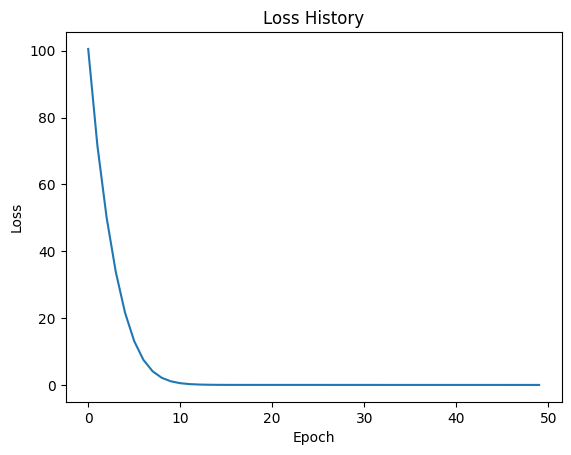

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [22]:
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch

In [23]:
x=[[1,2],[3,4],[5,6],[7,8]]
y=[[3],[7],[11],[15]]

In [24]:
X=torch.tensor(x).float()
Y=torch.tensor(y).float()

In [25]:
X=X.to(device)
Y=Y.to(device)

In [26]:
class MyDataset(Dataset):
  def __init__(self,x,y):
    self.x=torch.tensor(x).float()
    self.y=torch.tensor(y).float()
  def __len__(self):
    return len(self.x)
  def __getitem__(self,ix):
    return self.x[ix], self.y[ix]


In [27]:
ds=MyDataset(X,Y)

<ipython-input-26-f70fd2f8d3b3>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.x=torch.tensor(x).float()
<ipython-input-26-f70fd2f8d3b3>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.y=torch.tensor(y).float()


In [28]:
dl=DataLoader(ds, batch_size=2, shuffle=True)

In [29]:
for x,y in dl:
  print(x,y)

tensor([[3., 4.],
        [7., 8.]]) tensor([[ 7.],
        [15.]])
tensor([[5., 6.],
        [1., 2.]]) tensor([[11.],
        [ 3.]])


In [30]:
class MyNeuralnet(nn.Module):
  def __init__(self):
    super().__init__()
    self.input_to_hidden_layer=nn.Linear(2,8)
    self.hidden_to_activation=nn.ReLU()
    self.hidden_to_output_layer=nn.Linear(8,1)
  def forward(self,x):
    x=self.input_to_hidden_layer(x)
    x=self.hidden_to_activation(x)
    x=self.hidden_to_output_layer(x)
    return x

In [31]:
mynet=MyNeuralnet().to(device)
my_loss=nn.MSELoss()

In [32]:
from torch.optim import SGD
opt=SGD(mynet.parameters(), lr=0.001)

In [33]:
import time
loss_history=[]
start_time=time.time()
for epoch in range(50):
  for data in dl:
    x,y=data
    opt.zero_grad()
    loss_value=my_loss(mynet(x),y)
    loss_value.backward()
    opt.step()
    loss_history.append(loss_value.item())
end_time=time.time()
print(end_time-start_time)

0.4987924098968506


Text(0, 0.5, 'Loss')

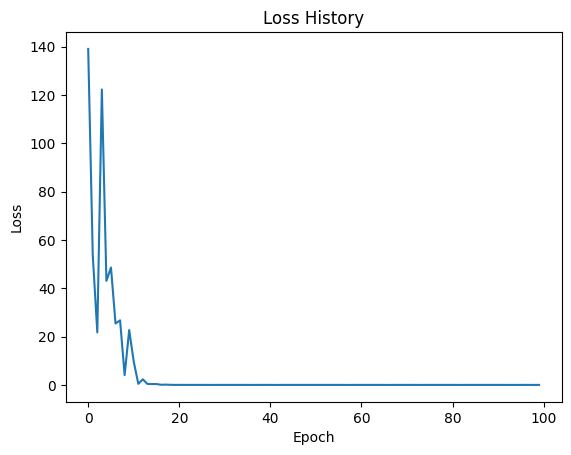

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [35]:
val_x=[[10,11]]

In [36]:
val_X=torch.tensor(val_x).float().to(device)

In [37]:
mynet(val_X)

tensor([[20.8618]], grad_fn=<AddmmBackward0>)

In [38]:
import numpy as np
def mse(_y,y):
  """
  Mean square error function

  args:
  _y: predicted value
  y: actual value

  returns:
  mean square error
  """
  loss=(_y-y)**2
  loss=loss.mean()
  return loss

In [39]:
mse(mynet(X),Y)

tensor(0.0054, grad_fn=<MeanBackward0>)

In [40]:
class Myneuralnet2(nn.Module):
  def __init__(self):
    super().__init__()
    self.input_to_hidden_layer=nn.Linear(2,8)
    self.hidden_to_activation=nn.ReLU()
    self.hidden_to_output_layer=nn.Linear(8,1)
  def forward(self,x):
    hidden1=self.input_to_hidden_layer(x)
    hidden2=self.hidden_to_activation(hidden1)
    output=self.hidden_to_output_layer(hidden2)
    return output, hidden2


In [41]:
neuralnet=Myneuralnet2()

In [42]:
for par in neuralnet.parameters():
  print(par)

Parameter containing:
tensor([[-0.4204, -0.1980],
        [ 0.3743, -0.5595],
        [ 0.4291,  0.1807],
        [-0.1087,  0.5876],
        [ 0.1841, -0.1487],
        [-0.4495,  0.2467],
        [ 0.5780,  0.6569],
        [-0.1809, -0.6408]], requires_grad=True)
Parameter containing:
tensor([-0.6875, -0.1693, -0.0485,  0.4700, -0.4380,  0.5716, -0.1338, -0.2774],
       requires_grad=True)
Parameter containing:
tensor([[-0.0435, -0.2118, -0.3198,  0.3500, -0.1127, -0.0186,  0.0643, -0.0725]],
       requires_grad=True)
Parameter containing:
tensor([0.2682], requires_grad=True)


In [43]:
loss_histroy=[]
for epoch in range(50):
  opt.zero_grad()
  loss_value=mse(neuralnet(X)[0],Y)
  loss_value.backward()
  opt.step()
  loss_histroy.append(loss_value.item())


Text(0, 0.5, 'Loss')

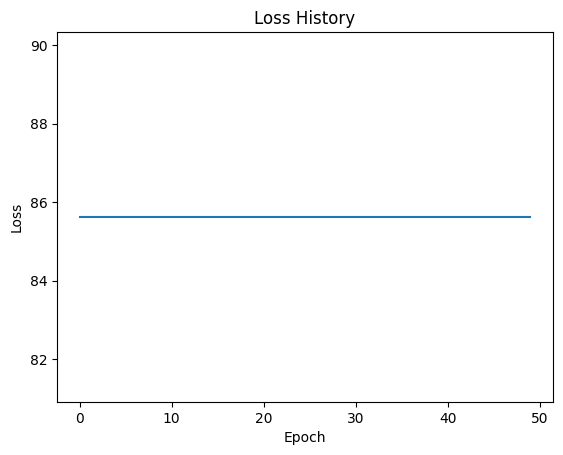

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_histroy)
plt.title("Loss History")
plt.xlabel("Epoch")
plt.ylabel("Loss")

## Neural Network using Sequential API

In [45]:
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]


In [46]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import Dataset, DataLoader
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [47]:
class Mydataset(Dataset):
  def __init__(self,x,y):
    self.x=torch.tensor(x).float().to(device)
    self.y=torch.tensor(y).float().to(device)
  def __getitem__(self,ix):
    return self.x[ix], self.y[ix]
  def __len__(self):
    return len(self.x)

In [48]:
ds=Mydataset(x,y)
dl=DataLoader(ds, batch_size=2, shuffle=True)

In [49]:
model=nn.Sequential(
    nn.Linear(2,8),
    nn.ReLU(),
    nn.Linear(8,1)
)

In [50]:
!pip install torch_summary
from torchsummary import summary


In [51]:
summary(model, torch.zeros(1,2))


Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 8]                   24
├─ReLU: 1-2                              [-1, 8]                   --
├─Linear: 1-3                            [-1, 1]                   9
Total params: 33
Trainable params: 33
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00


Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 8]                   24
├─ReLU: 1-2                              [-1, 8]                   --
├─Linear: 1-3                            [-1, 1]                   9
Total params: 33
Trainable params: 33
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [52]:
from torch.optim import SGD
import time

In [53]:
loss_fn=nn.MSELoss()
opt=SGD(model.parameters(),lr=0.001)
loss_hist=[]
start_time=time.time()
for epoch in range(50):
  for data in dl:
    x,y=data
    opt.zero_grad()
    loss_value=loss_fn(model(x),y)
    loss_value.backward()
    opt.step()
    loss_hist.append(loss_value.item())
end_time=time.time()
print(end_time-start_time)

0.1378345489501953


Text(0, 0.5, 'Loss')

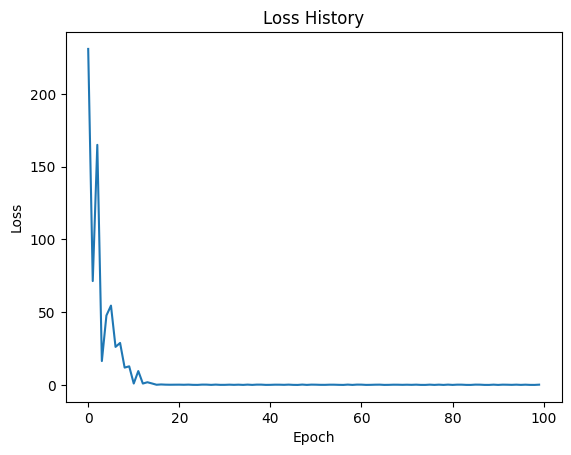

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_hist)
plt.title("Loss History")
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [55]:
torch.save(model.state_dict(),"model1.pth")

In [56]:
state_dic=torch.load("model1.pth")

In [57]:
model.load_state_dict(state_dic)

<All keys matched successfully>